In [2]:
import seaborn as sns
sns.__version__

'0.10.0'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
automobile_data = pd.read_csv('datasets/Automobile_data.csv', na_values = '?')
automobile_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
automobile_data.shape

(205, 26)

In [7]:
automobile_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
#drop all of the missing values
automobile_data.dropna(inplace = True)
automobile_data.shape

(159, 26)

In [11]:
#save out this data to a new CSV file called automobile_data_processed.csv
automobile_data.to_csv('datasets/automobile_data_processed.csv', index = False)

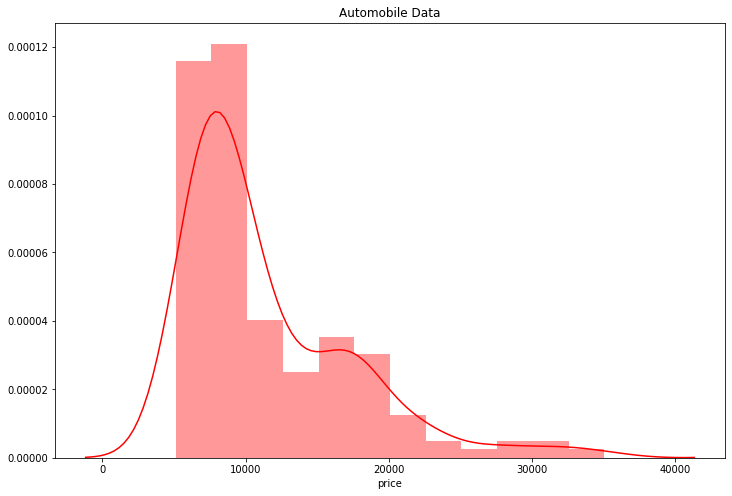

In [12]:
#the easiest way to view univariate distributions that exists in your data is to use the Seaborn distplot,
#which stands to distribution plot
plt.figure(figsize = (12, 8))
#histogram distribution of the price variable
#X axis, we have the different price ranges in the form of buckets,
#Y axis, the bars represent the number of vehicles
sns.distplot(automobile_data['price'],
            color = 'red')
plt.title('Automobile Data')
plt.show()

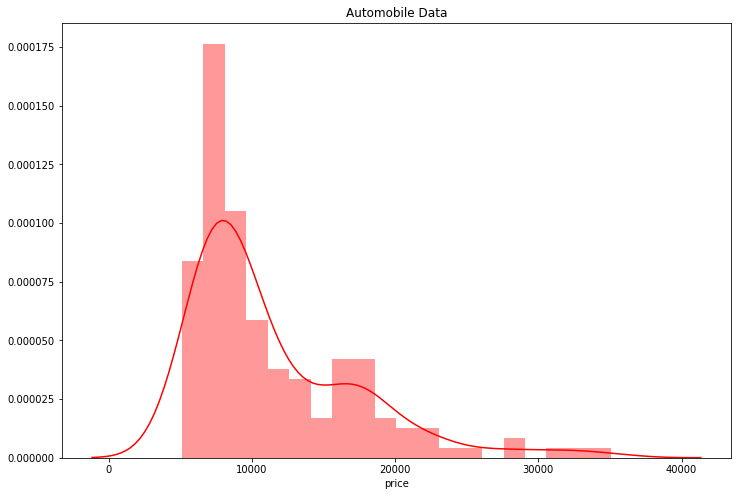

In [13]:
plt.figure(figsize = (12, 8))
#configure how the histogram is displayed as well by specifying 
#the number of bins, or buckets, that you want for the price ranges
#here is specified that the price of the automobiles should be split into 20 buckets, or bins
sns.distplot(automobile_data['price'],
            bins = 20, color = 'red')
plt.title('Automobile Data')
plt.show()

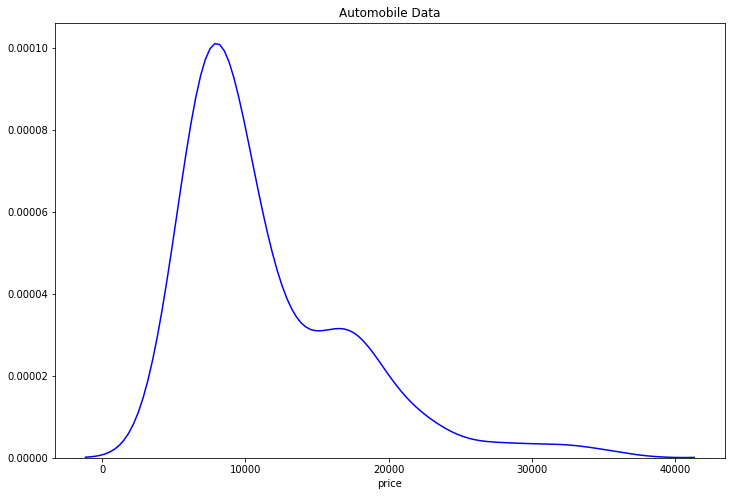

In [15]:
#only theKDE curve
plt.figure(figsize = (12, 8))

sns.distplot(automobile_data['price'],
            hist = False, color = 'blue')
plt.title('Automobile Data')
plt.show()

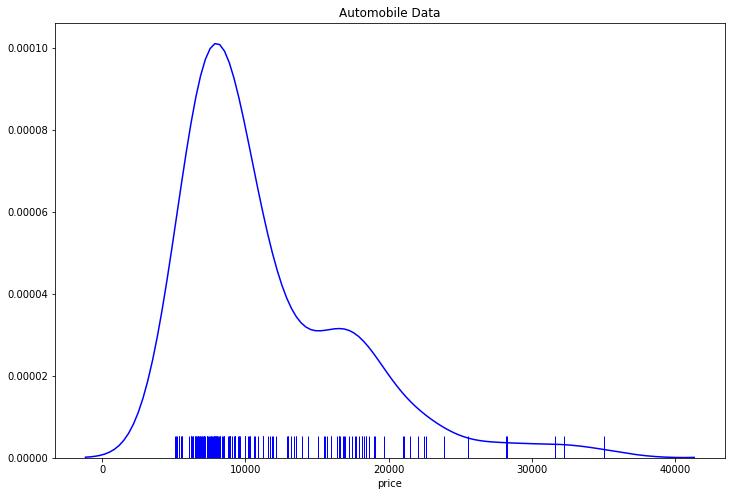

In [16]:
#visualize the actual data points or samples that exists in data
plt.figure(figsize = (12, 8))
#a rug plot represents individual data points in the form of vertical lines
sns.distplot(automobile_data['price'],
            hist = False, rug = True, color = 'blue')
plt.title('Automobile Data')
plt.show()

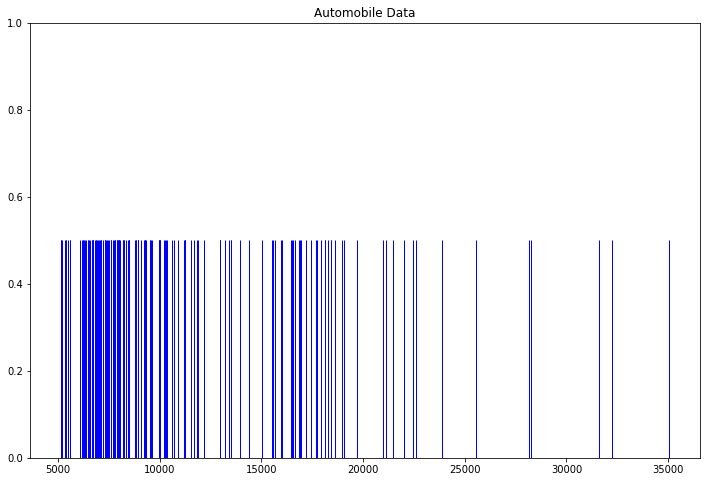

In [18]:
#seaborn allows to visualize each of these plots in isolation
plt.figure(figsize = (12, 8))
#just the rugplot = sns.rugplot
sns.rugplot(automobile_data['price'],
            height = 0.5, color = 'blue')
plt.title('Automobile Data')
plt.show()

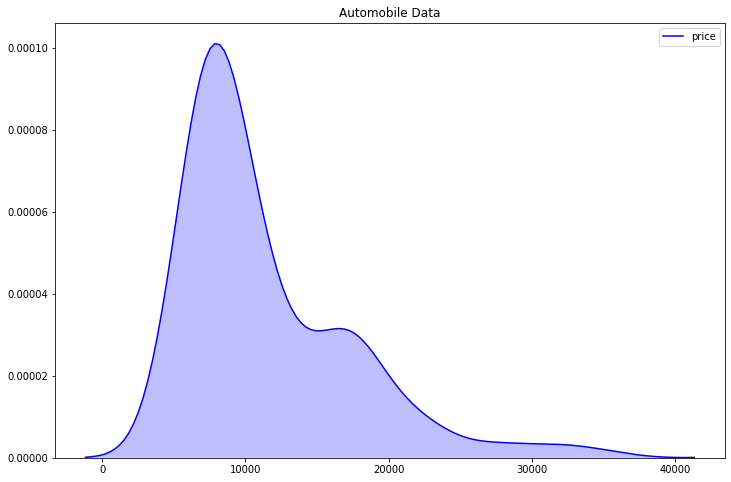

In [19]:
plt.figure(figsize = (12, 8))
#just the KDE plot
sns.kdeplot(automobile_data['price'],
            shade = True, color = 'blue') #shade = True, will shade the area under probability distribution func
plt.title('Automobile Data')
plt.show()

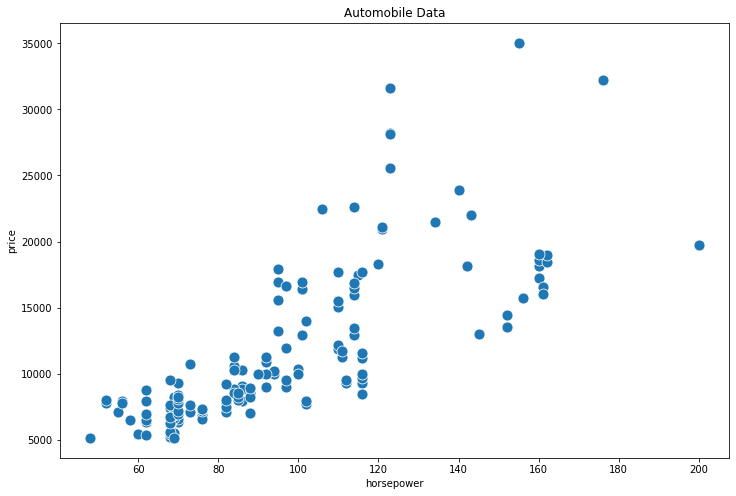

In [20]:
#visualize bivariate statistical relationship with scatter plot
plt.figure(figsize = (12, 8))
#scatter plot representation of horsepower vs price
sns.scatterplot(x = 'horsepower', y = 'price',
            data = automobile_data, s = 120)
plt.title('Automobile Data')
plt.show()

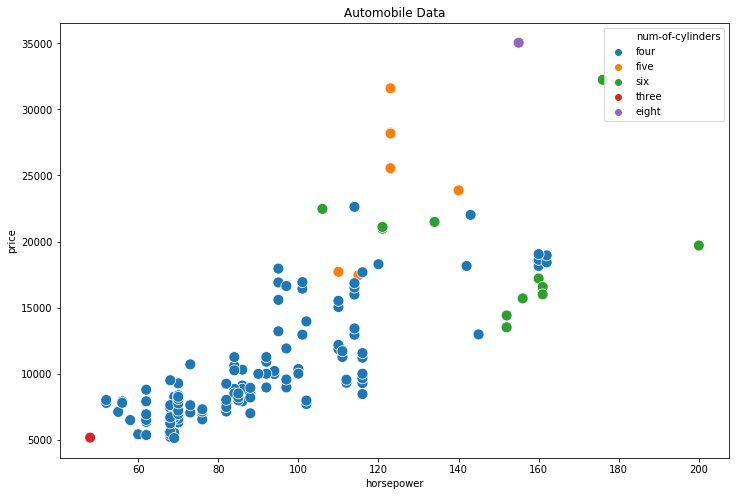

In [21]:
plt.figure(figsize = (12, 8))
#color the individual data points based on the number of cylinders,
#specify a value for the hue input argument
sns.scatterplot(x = 'horsepower', y = 'price',
            data = automobile_data, 
            hue = 'num-of-cylinders', s= 120)
plt.title('Automobile Data')
plt.show()

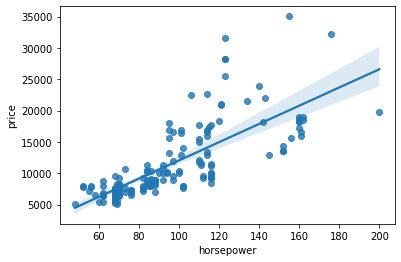

In [22]:
#seaborn supports regression plots
#this allows to quickly check whether a linear relationship exists between two variables
#regression plot of horsepower vs price
sns.regplot(x = 'horsepower', y = 'price',
            data = automobile_data)
plt.show()

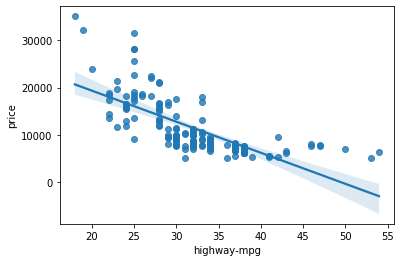

In [23]:
#negative relationships that might exists in data
sns.regplot(x = 'highway-mpg', y = 'price',
            data = automobile_data)
plt.show()

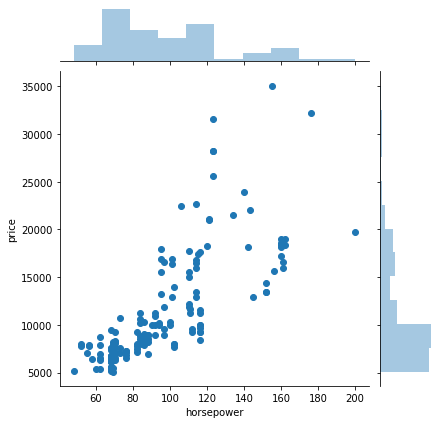

In [24]:
#view univariate and bivariate relationships in the same graph using jointplot
sns.jointplot(x = 'horsepower', y = 'price',
            data = automobile_data)
plt.show()

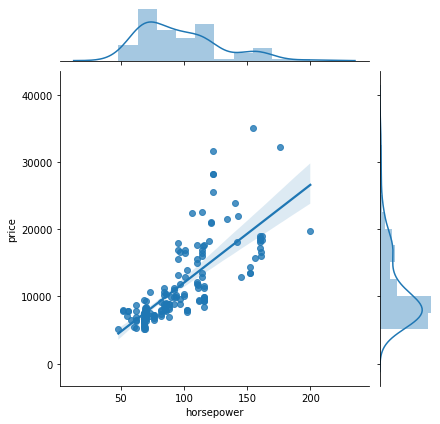

In [25]:
#scatter plot along with the frequency distribution histograms
#with the regression line -> kind = reg
sns.jointplot(x = 'horsepower', y = 'price',
            data = automobile_data, kind = 'reg')
plt.show()

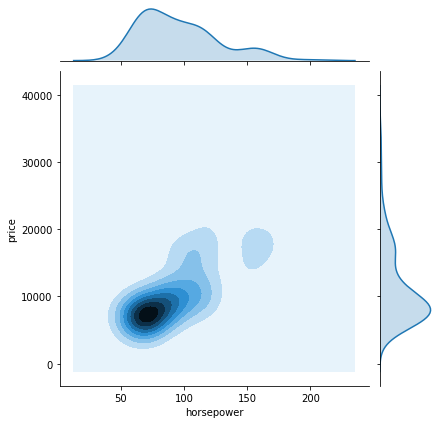

In [26]:
#the KDE curve can also be used to visualize bivariate relationships
#kind = kde that shows density
sns.jointplot(x = 'horsepower', y = 'price',
            data = automobile_data, kind = 'kde')
plt.show()

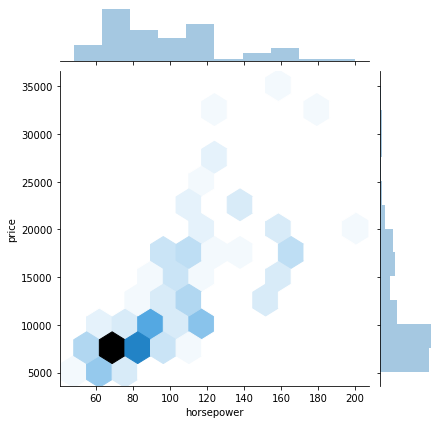

In [27]:
#a combination of the jointplot along with the probability density info is a hex bin plot
#instead of the individual data points, or the KDE curve, the entire two-dimensional surface
#of this plot has been divided into hexagons and the shade of the hexagon indicates the 
#density of the data
sns.jointplot(x = 'horsepower', y = 'price',
            data = automobile_data, kind = 'hex')
plt.show()

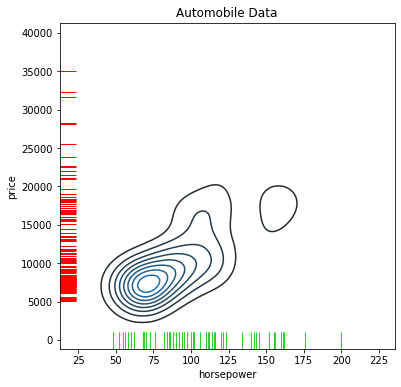

In [28]:
#all of these statistical visualizations can be layered together into a single plot
f, ax = plt.subplots(figsize = (6, 6))

#kde plot of horsepower vs price
sns.kdeplot(automobile_data['horsepower'], automobile_data['price'], ax = ax)
#in addition, along each axis, we'll have a rugplot showing the individual data points
sns.rugplot(automobile_data['horsepower'], color = 'limegreen', ax = ax)
sns.rugplot(automobile_data['price'], color = 'red', vertical = True, ax= ax)

plt.title('Automobile Data')
plt.show()